In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set()

plt.rcParams['figure.figsize'] = (12,6)

In [4]:
dfmond = pd.read_csv('monday.csv', sep=';')
dftue = pd.read_csv('tuesday.csv', sep=';')
dfwed = pd.read_csv('wednesday.csv', sep=';')
dfthu = pd.read_csv('thursday.csv', sep=';')
dffri = pd.read_csv('friday.csv', sep=';')
df = pd.concat([dfmond, dftue, dfwed, dfthu, dffri])


In [5]:
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [7]:
df.describe()

,customer_no
count,24877.000000
mean,745.139647
std,429.478200
min,1.000000
25%,372.000000
50%,747.000000
75%,1116.000000
max,1535.000000


In [8]:
df['date']= pd.to_datetime(df['timestamp'])
df['hour']= pd.to_datetime(df['timestamp'].astype(str)).dt.hour
df['minute']= pd.to_datetime(df['timestamp'].astype(str)).dt.minute
df.set_index('date', inplace= True)

In [9]:
df

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4
...,...,...,...,...,...
2019-09-06 21:50:00,2019-09-06 21:50:00,1500,dairy,21,50
2019-09-06 21:50:00,2019-09-06 21:50:00,1507,checkout,21,50
2019-09-06 21:50:00,2019-09-06 21:50:00,1508,checkout,21,50


### Calculate the total number of customers in each section

In [10]:

df['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

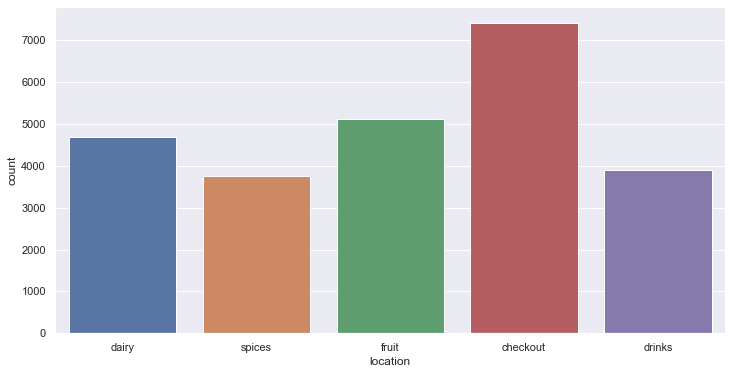

In [11]:
sns.countplot(x='location', data=df)

### Calculate the total numbers of customers in each sections over time

In [12]:
df

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4
...,...,...,...,...,...
2019-09-06 21:50:00,2019-09-06 21:50:00,1500,dairy,21,50
2019-09-06 21:50:00,2019-09-06 21:50:00,1507,checkout,21,50
2019-09-06 21:50:00,2019-09-06 21:50:00,1508,checkout,21,50


In [13]:
df1=df.groupby(['hour', 'customer_no', 'location']).sum()

In [14]:
df1


minute
hour customer_no location        
7    1           checkout      26
                 dairy          3
                 drinks         5
                 fruit          2
                 spices         4
...                           ...
21   1533        dairy         48
     1534        checkout      49
                 fruit         48
     1535        checkout      49
                 spices        48

[11621 rows x 1 columns]

In [15]:
df1

minute
hour customer_no location        
7    1           checkout      26
                 dairy          3
                 drinks         5
                 fruit          2
                 spices         4
...                           ...
21   1533        dairy         48
     1534        checkout      49
                 fruit         48
     1535        checkout      49
                 spices        48

[11621 rows x 1 columns]

In [16]:
df.groupby(['location','hour']).customer_no.count().unstack(0)

location,checkout,dairy,drinks,fruit,spices
hour,,,,,
7,454,275,278,299,238
8,677,455,348,468,342
9,455,291,231,336,207
10,427,294,198,270,242
11,342,210,150,244,165
12,384,225,188,247,208
13,514,340,238,389,273
14,496,319,229,345,261
15,412,233,190,316,184


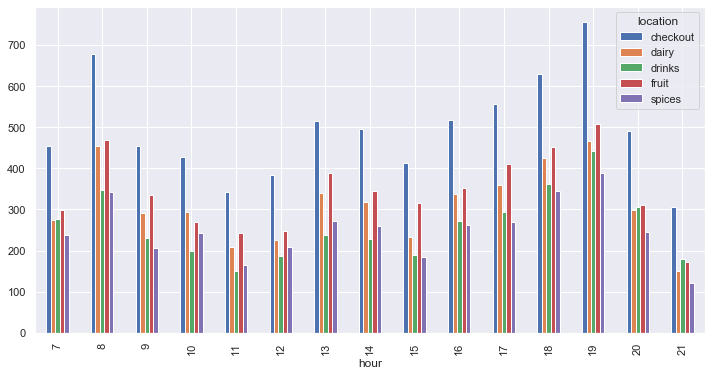

In [17]:
df.groupby(['location','hour']).customer_no.count().unstack(0).plot.bar()

### Display the number of customers at checkout over time

In [18]:
df_checkout= df.loc[df['location']== 'checkout']

In [19]:
df_checkout

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:05:00,2019-09-02 07:05:00,1,checkout,7,5
2019-09-02 07:05:00,2019-09-02 07:05:00,5,checkout,7,5
2019-09-02 07:06:00,2019-09-02 07:06:00,2,checkout,7,6
2019-09-02 07:06:00,2019-09-02 07:06:00,3,checkout,7,6
2019-09-02 07:07:00,2019-09-02 07:07:00,8,checkout,7,7
...,...,...,...,...,...
2019-09-06 21:47:00,2019-09-06 21:47:00,1502,checkout,21,47
2019-09-06 21:48:00,2019-09-06 21:48:00,1501,checkout,21,48
2019-09-06 21:48:00,2019-09-06 21:48:00,1504,checkout,21,48


In [20]:
df_checkout.groupby(['timestamp', 'customer_no']).sum()

hour  minute
timestamp           customer_no              
2019-09-02 07:05:00 1               7       5
                    5               7       5
2019-09-02 07:06:00 2               7       6
                    3               7       6
2019-09-02 07:07:00 8               7       7
...                               ...     ...
2019-09-06 21:47:00 1502           21      47
2019-09-06 21:48:00 1501           21      48
                    1504           21      48
2019-09-06 21:50:00 1507           21      50
                    1508           21      50

[7417 rows x 2 columns]

In [21]:
df[df['location'] == 'checkout'].groupby('hour')['customer_no'].count()

hour
7     454
8     677
9     455
10    427
11    342
12    384
13    514
14    496
15    412
16    518
17    556
18    630
19    755
20    492
21    305
Name: customer_no, dtype: int64

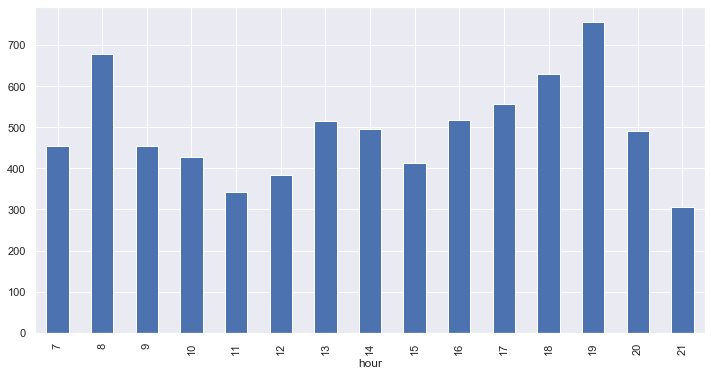

In [22]:
df[df['location'] == 'checkout'].groupby('hour')['customer_no'].count().plot.bar()

### Calculate the time each customer spent in the market

In [23]:
df2=df.groupby(['customer_no', 'timestamp', 'location']).sum()

In [24]:
df2

hour  minute
customer_no timestamp           location              
1           2019-09-02 07:03:00 dairy        7       3
            2019-09-02 07:05:00 checkout     7       5
            2019-09-03 07:02:00 fruit        7       2
            2019-09-03 07:05:00 drinks       7       5
            2019-09-03 07:12:00 checkout     7      12
...                                        ...     ...
1533        2019-09-05 21:48:00 dairy       21      48
1534        2019-09-05 21:48:00 fruit       21      48
            2019-09-05 21:49:00 checkout    21      49
1535        2019-09-05 21:48:00 spices      21      48
            2019-09-05 21:49:00 checkout    21      49

[24877 rows x 2 columns]

### Calculate the total number of customers present in the supermarket over time


In [25]:
df.groupby(['hour','customer_no']).count()

timestamp  location  minute
hour customer_no                             
7    1                   12        12      12
     2                   12        12      12
     3                   23        23      23
     4                   12        12      12
     5                   16        16      16
...                     ...       ...     ...
21   1531                 5         5       5
     1532                 1         1       1
     1533                 1         1       1
     1534                 2         2       2
     1535                 2         2       2

[3049 rows x 3 columns]

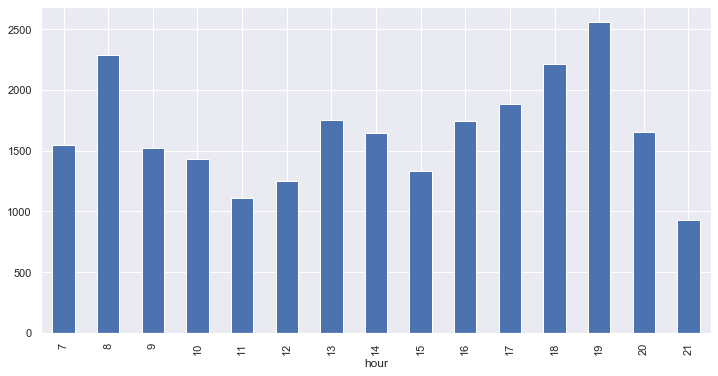

In [26]:
df.groupby('hour')['customer_no'].count().plot.bar()